In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# Load your chest X-ray image
image_path = '/content/7js9zo0r.png'  # Replace with your image path
image = cv2.imread(image_path)

# Resize the image (e.g., 512x512 for faster processing)
image_resized = cv2.resize(image, (512, 512))

# Convert image to RGB format (SAM expects RGB format)
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

In [ ]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth


--2025-05-01 19:39:32--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.170.229.64, 3.170.229.102, 3.170.229.118, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.170.229.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b.pth’

sam_vit_b.pth       100%[===================>] 357.67M   250MB/s    in 1.4s    

2025-05-01 19:39:33 (250 MB/s) - ‘sam_vit_b.pth’ saved [375042383/375042383]



Prediction: Pneumonia
Explanation: The image is predicted as Pneumonia with 65.07% confidence. Pneumonia is characterized by lung opacity in chest X-rays, often due to infection or inflammation. This could be due to bacterial or viral infection, fluid accumulation, or other respiratory conditions.


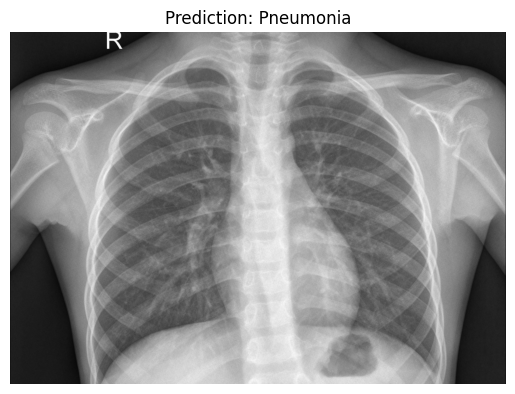

In [ ]:
import torch
import torchvision.transforms as transforms
import torchxrayvision as xrv
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from gtts import gTTS
import IPython.display as display
import os

# Load pre-trained chest X-ray model
model = xrv.models.DenseNet(weights="densenet121-res224-all")
model.eval()

# Load and preprocess X-ray image
img_path = "/content/7js9zo0r.png"  # Replace with your image path
img = Image.open(img_path).convert("L")  # Convert to grayscale
img_np = np.array(img).astype(np.float32)
img_np = (img_np / 255.0) * 2048 - 1024  # Rescale to [-1024, 1024]
img_resized = cv2.resize(img_np, (224, 224))  # Resize for model input
img_tensor = torch.tensor(img_resized).unsqueeze(0).unsqueeze(0)  # Shape [1, 1, 224, 224]

# Run prediction
output = model(img_tensor)
pred_idx = output[0].argmax().item()  # Index of the predicted label
pred_label = model.pathologies[pred_idx]  # Label name
confidence = torch.sigmoid(output[0])[pred_idx].item()  # Get confidence

# Generate explanation based on prediction
if pred_label.lower() == "pneumonia":
    explanation = f"The image is predicted as Pneumonia with {confidence:.2%} confidence. "
    explanation += "Pneumonia is characterized by lung opacity in chest X-rays, often due to infection or inflammation. "
    explanation += "This could be due to bacterial or viral infection, fluid accumulation, or other respiratory conditions."
else:
    explanation = f"The image appears Normal with {confidence:.2%} confidence. "
    explanation += "There are no abnormal opacities or signs of infection detected. "
    explanation += "The lungs appear clear and well-aerated, consistent with a healthy individual."

# Print prediction and explanation
print("Prediction:", pred_label)
print("Explanation:", explanation)

# Convert explanation to speech using gTTS
tts = gTTS(text=explanation, lang='en')
tts.save("explanation.mp3")  # Save the speech file

# Play the audio (for Jupyter/Colab environments)
display.display(display.Audio("explanation.mp3", autoplay=True))

# Show the X-ray image with prediction
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {pred_label}")
plt.axis("off")  # Hide axes
plt.show()


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prediction: Pneumonia
Explanation and Treatment Suggestions: Generate a detailed explanation about pneumonia diagnosis from a chest X-ray.

Figure 1. View largeDownload slide Comparison of the quality of the two primary oxygen source for pneumonia diagnosis.

Figure 1. View largeDownload slide Comparison of the quality of the two primary oxygen source for pneumonia diagnosis.

The total rate of lung cancer in the study cohort ranged from 0.37 (95% confidence interval [CI] 0.08–0.39) to 1.01 (95% CI 0.11–1.01) of infection per incident stroke. The respiratory rate of stroke was similar between individuals and in individuals with asthma and men with asthma. The rate of stroke in the men was similar to that of bronchiitis in the group without asthma, and the rate of stroke in the men was similar to that of bronchiitis in the group without bronchiitis. The lung cancer rate in the control group was similar to that of the controls, although the rate of stroke in

Suggest treatment for pneumo

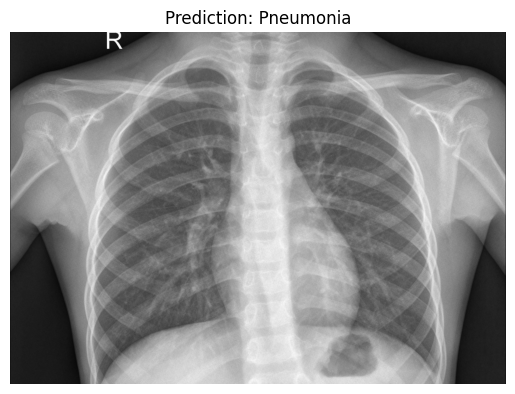

In [ ]:
import torch
import torchvision.transforms as transforms
import torchxrayvision as xrv
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from gtts import gTTS
import IPython.display as display
from transformers import pipeline  # For using Hugging Face NLP models

# Load pre-trained chest X-ray model
model = xrv.models.DenseNet(weights="densenet121-res224-all")
model.eval()

# Load pretrained NLP model for generating explanations
nlp_model = pipeline("text-generation", model="gpt2")  # You can choose a better model like BioGPT for medical tasks

# Load and preprocess X-ray image
img_path = "/content/7js9zo0r.png"  # Replace with your image path
img = Image.open(img_path).convert("L")  # Convert to grayscale
img_np = np.array(img).astype(np.float32)
img_np = (img_np / 255.0) * 2048 - 1024  # Rescale to [-1024, 1024]
img_resized = cv2.resize(img_np, (224, 224))  # Resize for model input
img_tensor = torch.tensor(img_resized).unsqueeze(0).unsqueeze(0)  # Shape [1, 1, 224, 224]

# Run prediction
output = model(img_tensor)
pred_idx = output[0].argmax().item()  # Index of the predicted label
pred_label = model.pathologies[pred_idx]  # Label name
confidence = torch.sigmoid(output[0])[pred_idx].item()  # Get confidence

# Dynamically generate explanation and medical suggestions using the NLP model based on prediction
if pred_label.lower() == "pneumonia":
    # Use the NLP model to generate a detailed explanation for pneumonia
    pneumonia_input = "Generate a detailed explanation about pneumonia diagnosis from a chest X-ray."
    explanation = nlp_model(pneumonia_input, max_length=200)[0]['generated_text']

    # Use the NLP model to generate treatment suggestions for pneumonia
    treatment_input = "Suggest treatment for pneumonia"
    treatment_suggestion = nlp_model(treatment_input, max_length=100)[0]['generated_text']

elif pred_label.lower() == "normal":
    # Use the NLP model to generate a detailed explanation for normal lung health
    normal_input = "Generate a detailed explanation about a normal chest X-ray without signs of pneumonia or infection."
    explanation = nlp_model(normal_input, max_length=200)[0]['generated_text']

    # Use the NLP model to generate general health tips for lung health
    health_input = "Give general health tips for lung health and maintaining good respiratory function."
    treatment_suggestion = nlp_model(health_input, max_length=100)[0]['generated_text']

# Combine explanation and treatment suggestions
full_explanation = explanation + "\n\n" + treatment_suggestion

# Print prediction and explanation
print("Prediction:", pred_label)
print("Explanation and Treatment Suggestions:", full_explanation)

# Convert explanation and treatment suggestion to speech using gTTS
tts = gTTS(text=full_explanation, lang='en')
tts.save("explanation_with_treatment.mp3")  # Save the speech file

# Play the audio (for Jupyter/Colab environments)
display.display(display.Audio("explanation_with_treatment.mp3", autoplay=True))

# Show the X-ray image with prediction
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {pred_label}")
plt.axis("off")  # Hide axes
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your kaggle.json file

Saving kaggle.json to kaggle.json


In [ ]:
import os

# Create the kaggle directory and move the json file
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/

# Set permissions (important!)
!chmod 600 /root/.kaggle/kaggle.json

# Verify setup
!kaggle config view

Configuration values from /root/.kaggle
- username: snehaaas
- path: None
- proxy: None
- competition: None


In [ ]:
# Example: Download Chest X-Ray Pneumonia dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Unzip the dataset (replace filename if different)
!unzip -q chest-xray-pneumonia.zip -d chest_xray

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other


In [ ]:
# Check the extracted files
!ls chest_xray/chest_xray/chest_xray

# Expected structure:
# chest_xray/
# ├── train/
# │   ├── NORMAL/
# │   └── PNEUMONIA/
# ├── test/
# │   ├── NORMAL/
# │   └── PNEUMONIA/
# └── val/

test  train  val


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt


class ChestXrayDataset(Dataset):
    def __init__(self, root_dir, mode="train", noise_type="gaussian+motion", target_size=(256, 256)):
        self.root_dir = os.path.join(root_dir, mode)
        self.classes = ["NORMAL", "PNEUMONIA"]
        self.noise_type = noise_type
        self.target_size = target_size
        self.image_paths = []

        # Verify root directory exists
        if not os.path.exists(self.root_dir):
            raise FileNotFoundError(f"Directory not found: {self.root_dir}")

        # Load image paths
        for cls in self.classes:
            cls_dir = os.path.join(self.root_dir, cls)
            if os.path.exists(cls_dir):
                for img_name in os.listdir(cls_dir):
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.image_paths.append((os.path.join(cls_dir, img_name), cls))

        # Verify we found images
        if len(self.image_paths) == 0:
            raise RuntimeError(f"No images found in {self.root_dir}")

        print(f"Loaded {len(self.image_paths)} images from {mode} set")

        self.transform = transforms.Compose([
            transforms.Grayscale(),
            transforms.Resize(self.target_size),
            transforms.ToTensor(),
            transforms.Normalize(0.5, 0.5)
        ])

    def __len__(self):
        """Returns the total number of images"""
        return len(self.image_paths)

    def add_medical_noise(self, img_np):
        """Add realistic noise to chest X-rays"""
        # Gaussian noise (sensor noise)
        if "gaussian" in self.noise_type:
            row, col = img_np.shape
            mean = 0
            var = 0.1 * img_np.max()
            sigma = var ** 0.5
            gauss = np.random.normal(mean, sigma, (row, col))
            noisy = img_np + gauss

        # Motion blur (patient movement)
        if "motion" in self.noise_type:
            size = 15
            kernel = np.zeros((size, size))
            kernel[int((size-1)/2), :] = np.ones(size)
            kernel /= size
            noisy = cv2.filter2D(noisy, -1, kernel)

        return np.clip(noisy, 0, 255).astype(np.uint8)

    def __getitem__(self, idx):
        img_path, label = self.image_paths[idx]
        try:
            img = Image.open(img_path).convert('L')
            img = img.resize(self.target_size)
            img_np = np.array(img)

            # Add noise
            noisy_img = self.add_medical_noise(img_np)
            noisy_img = Image.fromarray(noisy_img)

            # Apply transforms
            clean = self.transform(img)
            noisy = self.transform(noisy_img)

            class_idx = self.classes.index(label)
            return noisy, clean, class_idx

        except Exception as e:
            print(f"Error loading {img_path}: {str(e)}")
            # Return zero tensors if image fails to load
            dummy = torch.zeros(1, *self.target_size)
            return dummy, dummy, 0

class UNetGenerator(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super().__init__()

        # Downsampling
        self.down1 = nn.Sequential(
            nn.Conv2d(in_channels, 64, 4, 2, 1),
            nn.LeakyReLU(0.2)
        )
        self.down2 = nn.Sequential(
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2)
        )
        self.down3 = nn.Sequential(
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2)
        )

        # Upsampling
        self.up1 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.up2 = nn.Sequential(
            nn.ConvTranspose2d(256, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.up3 = nn.Sequential(
            nn.ConvTranspose2d(128, out_channels, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, x):
        # Encoder
        d1 = self.down1(x)  # 256x256 -> 128x128
        d2 = self.down2(d1)  # 128x128 -> 64x64
        d3 = self.down3(d2)  # 64x64 -> 32x32

        # Decoder with skip connections
        u1 = self.up1(d3)  # 32x32 -> 64x64
        u2 = self.up2(torch.cat([u1, d2], 1))  # 64x64 -> 128x128
        u3 = self.up3(torch.cat([u2, d1], 1))  # 128x128 -> 256x256

        return u3

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 1, 4, 1, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


def train_gan(train_loader, epochs=10, device="cuda"):
    G = UNetGenerator().to(device)
    D = Discriminator().to(device)

    # Loss functions
    criterion_GAN = nn.BCELoss()
    criterion_pixel = nn.L1Loss()
    lambda_pixel = 100

    # Optimizers
    opt_G = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
    opt_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

    for epoch in range(epochs):
        for i, (noisy, clean, _) in enumerate(train_loader):
            real = clean.to(device)
            noisy = noisy.to(device)

            # Get discriminator output size
            with torch.no_grad():
                out_size = D(real).shape[2:]

            # Train Discriminator
            D.zero_grad()
            fake = G(noisy)
            real_loss = criterion_GAN(D(real), torch.ones(real.size(0), 1, *out_size).to(device))
            fake_loss = criterion_GAN(D(fake.detach()), torch.zeros(fake.size(0), 1, *out_size).to(device))
            d_loss = (real_loss + fake_loss) / 2
            d_loss.backward()
            opt_D.step()

            # Train Generator
            G.zero_grad()
            g_loss = criterion_GAN(D(fake), torch.ones(fake.size(0), 1, *out_size).to(device))
            pixel_loss = criterion_pixel(fake, real)
            total_loss = g_loss + lambda_pixel * pixel_loss
            total_loss.backward()
            opt_G.step()

        print(f"Epoch {epoch}: D_loss={d_loss.item():.3f}, G_loss={total_loss.item():.3f}")

    return G


def train_gan(train_loader, epochs=10, device="cuda"):
    G = UNetGenerator().to(device)
    D = Discriminator().to(device)

    criterion_GAN = nn.BCELoss()
    criterion_pixel = nn.L1Loss()
    lambda_pixel = 100

    opt_G = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
    opt_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

    for epoch in range(epochs):
        for i, (noisy, clean, _) in enumerate(train_loader):
            real = clean.to(device)
            noisy = noisy.to(device)

            # Train Discriminator
            D.zero_grad()
            fake = G(noisy)
            real_pred = D(real)
            fake_pred = D(fake.detach())

            # Create properly sized targets
            real_target = torch.ones_like(real_pred)
            fake_target = torch.zeros_like(fake_pred)

            real_loss = criterion_GAN(real_pred, real_target)
            fake_loss = criterion_GAN(fake_pred, fake_target)
            d_loss = (real_loss + fake_loss) / 2
            d_loss.backward()
            opt_D.step()

            # Train Generator
            G.zero_grad()
            fake_pred = D(fake)
            g_loss = criterion_GAN(fake_pred, real_target)
            pixel_loss = criterion_pixel(fake, real)
            total_loss = g_loss + lambda_pixel * pixel_loss
            total_loss.backward()
            opt_G.step()

        print(f"Epoch {epoch}: D_loss={d_loss.item():.3f}, G_loss={total_loss.item():.3f}")

    return G

class PneumoniaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128*32*32, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


if __name__ == "__main__":
    # Initialize
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")

    # 1. Prepare Data
    train_dataset = ChestXrayDataset("chest_xray/chest_xray/chest_xray", mode="train")
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    # Test the dimensions
    test_input = torch.randn(1, 1, 256, 256).to(device)
    G = UNetGenerator().to(device)
    D = Discriminator().to(device)

    print("Generator output size:", G(test_input).shape)  # Should be [1, 1, 256, 256]
    print("Discriminator output size:", D(test_input).shape)  # Should be [1, 1, 30, 30]
        # 2. Train GAN
    print("Training GAN for image enhancement...")
    generator = train_gan(train_loader, epochs=10, device=device)
    torch.save(generator.state_dict(), "generator.pth")

    # 3. Train Classifier on Enhanced Images
    print("\nTraining Classifier...")
    classifier = PneumoniaClassifier().to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(classifier.parameters(), lr=0.001)

    for epoch in range(10):
        for noisy, _, labels in train_loader:
            noisy = noisy.to(device)
            labels = labels.float().unsqueeze(1).to(device)

            # Enhance images
            with torch.no_grad():
                enhanced = generator(noisy)

            # Classify
            optimizer.zero_grad()
            outputs = classifier(enhanced)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch}: Loss={loss.item():.4f}")

    torch.save(classifier.state_dict(), "classifier.pth")



Using device: cuda
Loaded 5216 images from train set
Generator output size: torch.Size([1, 1, 256, 256])
Discriminator output size: torch.Size([1, 1, 31, 31])
Training GAN for image enhancement...
Epoch 0: D_loss=0.513, G_loss=12.848
Epoch 1: D_loss=0.210, G_loss=7.843
Epoch 2: D_loss=0.012, G_loss=9.759
Epoch 3: D_loss=0.409, G_loss=8.387
Epoch 4: D_loss=0.074, G_loss=11.034
Epoch 5: D_loss=0.116, G_loss=10.198
Epoch 6: D_loss=0.454, G_loss=8.208
Epoch 7: D_loss=0.156, G_loss=6.828
Epoch 8: D_loss=0.154, G_loss=7.054
Epoch 9: D_loss=0.174, G_loss=6.606

Training Classifier...
Epoch 0: Loss=0.1519
Epoch 1: Loss=0.0452
Epoch 2: Loss=0.0319
Epoch 3: Loss=0.2024
Epoch 4: Loss=0.0025
Epoch 5: Loss=0.1323
Epoch 6: Loss=0.0020
Epoch 7: Loss=0.0007
Epoch 8: Loss=0.0000
Epoch 9: Loss=0.0011


FileNotFoundError: Directory not found: chest_xray/test

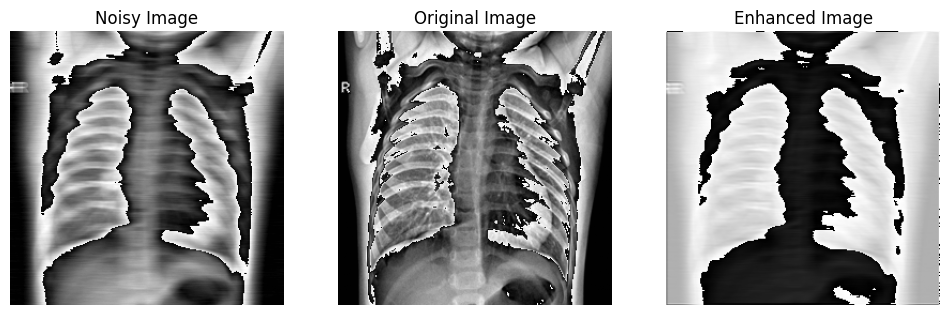

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

# Function to visualize images
def visualize_images(noisy, clean, enhanced):
    # Convert tensors back to PIL images for displaying
    to_pil = transforms.ToPILImage()

    noisy_img = to_pil(noisy.squeeze(0).cpu())
    clean_img = to_pil(clean.squeeze(0).cpu())
    enhanced_img = to_pil(enhanced.squeeze(0).cpu())

    # Create a plot to display the images
    plt.figure(figsize=(12, 4))

    # Noisy image
    plt.subplot(1, 3, 1)
    plt.imshow(noisy_img, cmap='gray')
    plt.title("Noisy Image")
    plt.axis('off')

    # Original (Clean) image
    plt.subplot(1, 3, 2)
    plt.imshow(clean_img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Enhanced image
    plt.subplot(1, 3, 3)
    plt.imshow(enhanced_img, cmap='gray')
    plt.title("Enhanced Image")
    plt.axis('off')

    plt.show()

# Example of how to use the function
# Let's assume noisy, clean, and enhanced are already obtained from the dataloader and generator

# Get a sample from the dataset
sample_noisy, sample_clean, _ = train_dataset[0]  # Use the first sample
sample_noisy = sample_noisy.unsqueeze(0).to(device)  # Add batch dimension and move to device

# Enhance the image using the trained generator
with torch.no_grad():
    sample_enhanced = generator(sample_noisy).cpu()

# Visualize the results
visualize_images(sample_noisy, sample_clean, sample_enhanced)